(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6945 - val_loss: 0.6945
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6943 - val_loss: 0.6943
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6940 - val_loss: 0.6940
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6937 - val_loss: 0.6937
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6934 - val_loss: 0.6934
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss:

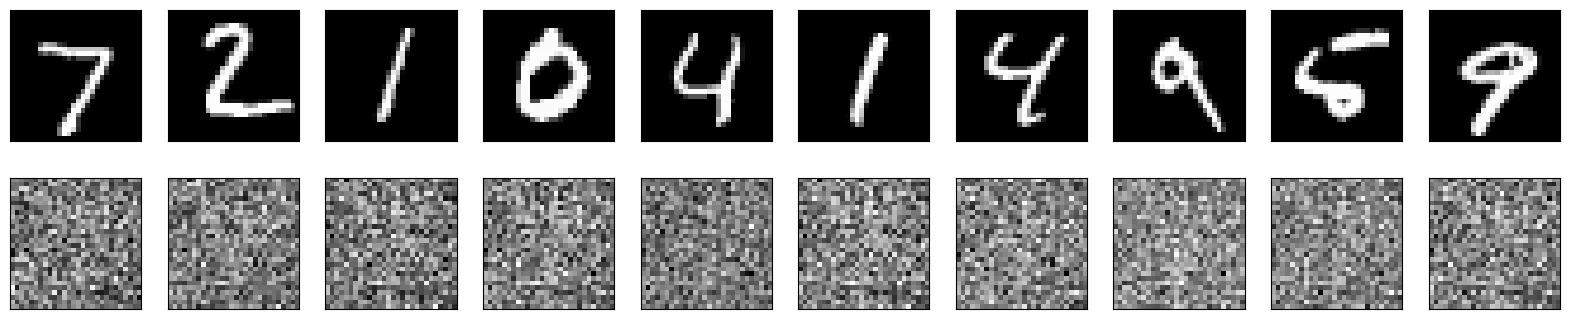

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [2]:
epoch_sizes = [5, 10, 20, 30, 40, 50, 100]

for epochs in epoch_sizes:
    autoencoder.fit(x_train, x_train,
                    epochs=epochs,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test))

    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = decoder.predict(encoded_imgs)
    # Display results or save them as needed

Epoch 1/5
235/235 [==============================] - 1s 3ms/step - loss: 0.6864 - val_loss: 0.6863
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6862 - val_loss: 0.6860
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6860 - val_loss: 0.6858
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6858 - val_loss: 0.6856
Epoch 5/5
313/313 [==============================] - 0s 409us/step
Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6853 - val_loss: 0.6851
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6851 - val_loss: 0.6848
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6848 - val_loss: 0.6846
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6846 - val_loss: 0.6843
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6843 - val_loss: 0.6841
Epoch 6/10
235/235 [=================

In [3]:
from keras.layers import Input, Dense

# Define the number of layers you want to test
num_layers_list = [2, 3, 4, 5]

for num_layers in num_layers_list:
    # Build the encoder and decoder models with the desired number of layers
    input_img = Input(shape=(784,))
    encoded = input_img
    for _ in range(num_layers):
        encoded = Dense(encoding_dim, activation='relu')(encoded)
    decoded = Dense(784, activation='sigmoid')(encoded)
    
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

    # Training and evaluation code remains the same as before
    autoencoder.fit(x_train, x_train,
                    epochs=50,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test))

    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = decoder.predict(encoded_imgs)
    # Display results or save them as needed

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6926 - val_loss: 0.6926
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6925 - val_loss: 0.6925
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6924 - val_loss: 0.6924
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6922 - val_loss: 0.6922
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6921 - val_loss: 0.6921
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6920 - val_loss: 0.6920
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6919 - val_loss: 0.6919
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6918 - val_loss: 0.6918
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6917 - val_loss: 0.6917

In [5]:
# Load and preprocess your anomaly images (you need to implement this)

from PIL import Image
import cv2

import os
import numpy as np
from PIL import Image

# # Set the path to the folder with images 
# folder = 'Downloads/Objects'

# # Loop through all files in the folder
# for filename in os.listdir(folder):
#     # Check if file is an image file
#     if filename.endswith( ('.jpg', '.jpeg', '.png', '.bmp') ):
#         # Load the image
#         img = Image.open(os.path.join(folder,filename)) 
#         # Convert to numpy array
#         original_images = np.array(img)

original_images = np.array(['Downloads/notebook-straight_45.jpg','Downloads/coffee_mug-straight_on.jpg','Downloads/car.jpeg','Downloads/wine_bottle-straight_on.jpg','Downloads/soap_dispenser-straight_45.jpg'])

def preprocess_anomaly_images(original_images):
    processed_images = []
    for imgs in original_images:
        # Read image
        img = Image.open(imgs)

        # Convert to grayscale 
        img = img.convert('L')
        arr = np.array(img)
        
    return np.array(processed_images)


anomaly_images = preprocess_anomaly_images(original_images)



# Predict the anomaly images
anomaly_encoded_imgs = encoder.predict(anomaly_images)
anomaly_decoded_imgs = decoder.predict(anomaly_encoded_imgs)

# Measure differences between input and reconstructed images
differences = np.abs(anomaly_images - anomaly_decoded_imgs)

# You can then analyze 'differences' to detect anomalies
# For example, you can set a threshold for anomaly detection
threshold = 0.1  # Adjust as needed
anomalies = differences > threshold

# Print or visualize the anomalies
for i, is_anomaly in enumerate(anomalies):
    if is_anomaly:
        plt.figure()
        plt.imshow(anomaly_images[i].reshape(28, 28), cmap='gray')
        plt.title('Anomaly')

ValueError: Expected input data to be non-empty.